In [1]:
# %pip install -U qiskit
from qiskit import __version__
print('Qiskit Sürümü: ', __version__)

Qiskit Sürümü:  1.0.2


## <b>Qiskit ile Kuantum Süper Yoğun Kodlama Algoritması

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile, assemble
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit import quantum_info
from qiskit.visualization import plot_bloch_multivector

## Bell çifti (dolakılık) oluşturmak için fonksiyon hazırlanır

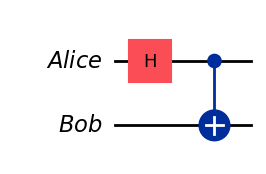

In [33]:
def create_bell_pair():
    alice = QuantumRegister(1, name='Alice')
    bob = QuantumRegister(1, name='Bob')
    qc = QuantumCircuit(alice, bob)
    qc.h(0)
    qc.cx(0, 1)
    return qc

# Bell çiftini kim oluşturduğu önemli değil,
# fakat karşı tarafa bir eşini göndermelidir.
create_bell_pair().draw(output='mpl')

## Alice 2 bitlik mesajınu kendi kübitine aşağıdaki biçimde kodlayabilir

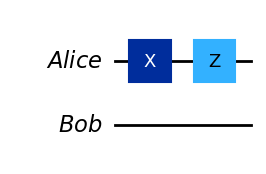

In [34]:
def encode_message(qc, qubit, msg):
    if len(msg) != 2 or not set([0,1]).issubset({0,1}):
        raise ValueError(f"mesaj 2 bitlik olmalı!")
        
    # Mesajın ikinci biti 1 ise Alice X uygular. 
    if msg[1] == "1":
        qc.x(qubit)
        
    # Mesajın ilk biti 1 ise Alice Z uygular. 
    if msg[0] == "1":
        qc.z(qubit)
    return qc

# Örnek olarak mesaj='11' ise Alice'in uyguladığı kapılar 
encode_message(QuantumCircuit(QuantumRegister(1, 'Alice'), QuantumRegister(1, 'Bob')), 0, '11').draw(output='mpl')

## Bob daha sonra kodlamayı çözmesi gerekir

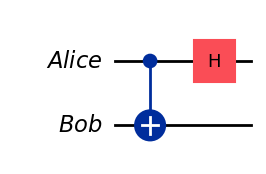

In [35]:
def decode_message(qc):
    qc.cx(0, 1)
    qc.h(0)
    return qc

# Alice'ten kodlanış kübiti alan Bob'un elinde 2 kübit vardır.
# Bob aşağıdaki gibi kapıları uygulayark çözümleme yapar.
decode_message(QuantumCircuit(QuantumRegister(1, 'Alice'), QuantumRegister(1, 'Bob'))).draw(output='mpl')

## Algoritma tam olarak aşağıdaki biçimde gerçekleşir

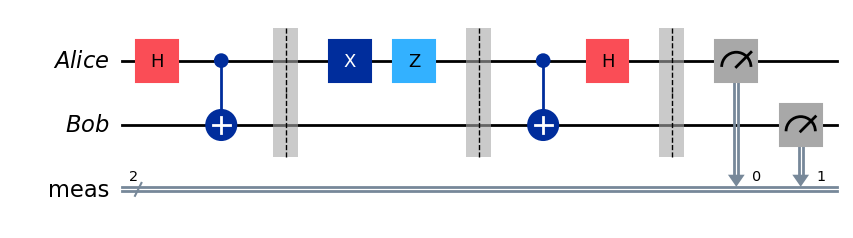

In [36]:
sdc_circuit = create_bell_pair()
sdc_circuit.barrier()

message = '11'
sdc_circuit = encode_message(sdc_circuit, 0, message)
sdc_circuit.barrier()

sdc_circuit = decode_message(sdc_circuit)
sdc_circuit.measure_all()

sdc_circuit.draw(output='mpl')

## Devre simüle edildiğinde Bob gönderilmek istenen mesahı elde eder

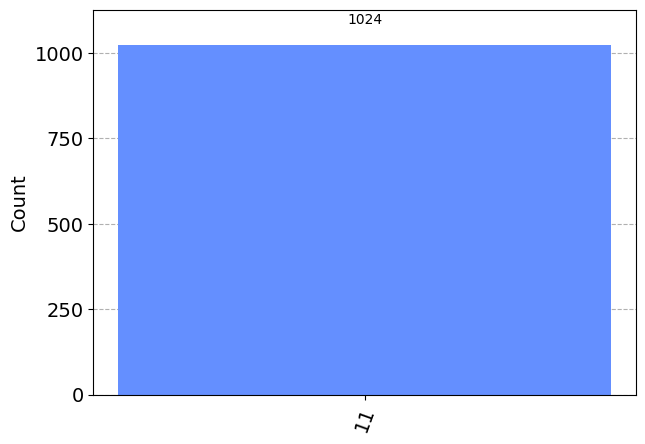

In [37]:
simulator = AerSimulator()
sdc_circuit = transpile(sdc_circuit, simulator)
result = simulator.run(sdc_circuit).result().get_counts(0)
plot_histogram(result)

## Tüm mesajlar için test edelim

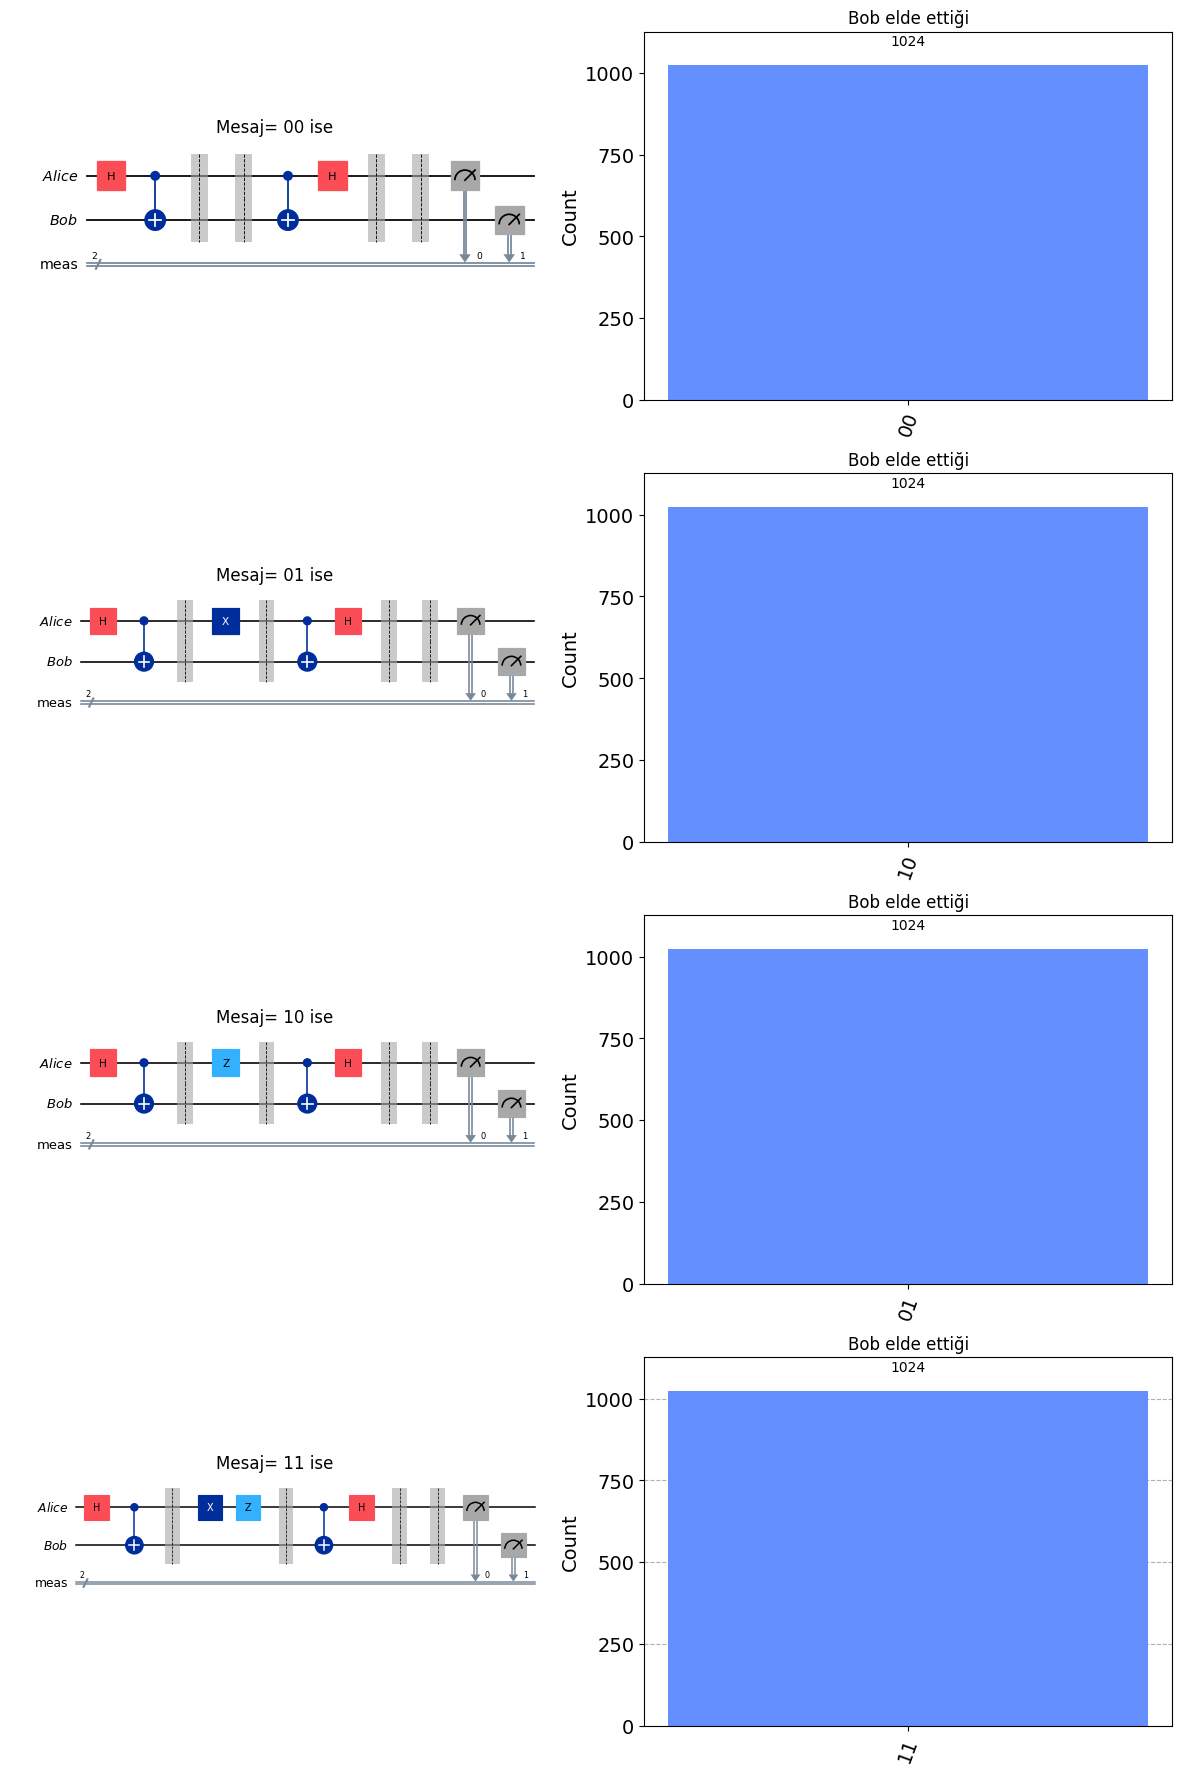

In [48]:
figure, axs = plt.subplots(4, 2, figsize=(15, 22))
for i in range(4):
    sdc_circuit = create_bell_pair()
    sdc_circuit.barrier()
    message = f'{i:02b}'
    sdc_circuit = encode_message(sdc_circuit, 0, message)
    sdc_circuit.barrier()
    sdc_circuit = decode_message(sdc_circuit)
    sdc_circuit.barrier()
    sdc_circuit.measure_all()
    axs[i][0].set_title(f'Mesaj= {message} ise')
    sdc_circuit.draw(output='mpl', ax=axs[i][0])

    simulator = AerSimulator()
    sdc_circuit = transpile(sdc_circuit, simulator)
    result = simulator.run(sdc_circuit).result().get_counts(0)
    axs[i][1].set_title(f'Bob elde ettiği')
    plot_histogram(result, ax=axs[i][1])